## **Оценка риска ДТП**

### Описание задачи

Требуется создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Обязательные условия при разработки:
- Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties).
- Для модели выбрать тип виновника — только машина (car).
- Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
- Для моделирования ограничиться данными за 2012 год — они самые свежие.
- Обязательное условие — учесть фактор возраста автомобиля.

На основе модели исследовать основные факторы ДТП.
- Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
- Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
- Какие ещё факторы нужно учесть?
- Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

### **Задачи исследования**

#### **Этап 1.** Загрузить таблицы sql

- Подключиться к базе данных.

#### **Этап 2.** Провести первичное исследование таблиц

- Все ли таблицы имеют набор данных;
- Соответствует ли количество таблиц условию задачи;
- Имеется ли общий ключ для связи таблиц.

#### **Этап 3.** Провеcти статистический анализ факторов ДТП

- Выяснить, в какие месяцы происходит наибольшее количество аварий. Проанализировать весь период наблюдений (таблица collisions);
- Создать sql-запрос;
- Построить график.

Скоро состоится первое совещание рабочей группы. Чтобы обсуждение было конструктивным, каждый сотрудник должен понимать данные. Для этого необходимо создать подходящие аналитические задачи и поручить их решение коллегам.

Примеры задач:

Проведите анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать collisions и parties);
Найдите самые частые причины ДТП (таблица parties).

- Создать не менее шести задач для коллег. Опирайтесь на примеры и таблицы.
- Прописать порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц.

Пример прописанного порядка:
1. Создайте sql-запрос;
2. Постройте график;
3. Сделайте вывод.

#### **Этап 4.** Создать модель для оценки водительского риска

- Подготовить набор данных на основе первичного предположения заказчика;
- Выбрать тип виновника — только машина (car);
- Взять случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина);
- Для моделирования взять данные только за 2012 год;
- Подготовка исходной таблицы должна проводиться с помощью sql-запроса;
- Провести первичный отбор факторов, необходимых для модели;
- Изучить описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП;
- Провести статистическое исследование отобранных факторов;
- По результату исследовательского анализа внести корректировки, если они нужны;
- Если необходимо, категоризировать исходные данные, провести масштабирование;
- Подготовить обучающую и тестовую выборки.

#### **Этап 5.** Найти лучшую модель

- Смоделировать не менее 3-х типов моделей с перебором гиперпараметров;
- Выберать метрику для оценки модели, исходя из поставленной бизнесом задачи. Обосновать выбор;
- Оформить вывод в виде сравнительной таблицы.

#### **Этап 6.** Проверить лучшую модель в работе

- Провести графический анализ «Матрица ошибок». Вывести полноту и точность на график;
- Проанализировать важность основных факторов, влияющих на вероятность ДТП;
- Для одного из выявленных важных факторов провести дополнительное исследование:
    - Показать график зависимости фактора и целевой переменной.
    - Предложить, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.

#### **Этап 7.** Сделать общий вывод по модели

- Кратко описать лучшую модель;
- Сделать вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
- Какие факторы ещё необходимо собирать, чтобы улучшить модель?

#### **Описание таблиц**

- collisions — общая информация о ДТП. Имеет уникальный case_id.

- parties — информация об участниках ДТП.

- vehicles — информация о пострадавших машинах.

In [ ]:
from sqlalchemy import create_engine

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import GradientBoostingClassifier

In [ ]:
RANDOM_STATE = 42

### **Этап 1. Загрузка таблиц sql**

#### Загрузим данные с БД

In [ ]:
db_config = {
'user': 'praktikum_student',
'pwd': 'Sdf4$2;d-d30pp',
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,
'db': 'data-science-vehicle-db'
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [ ]:
engine = create_engine(connection_string)

### **Этап 2. Первичное исследование таблиц**

#### Проверим все таблицы на наличие данных и соответствует ли количество таблиц условию задачи

In [ ]:
query = '''
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public';
'''

In [ ]:
sample_df = pd.read_sql_query(query, con=engine)

In [ ]:
tables_df = pd.read_sql_query(query, con=engine)

record_counts = {}
for table in tables_df['table_name']:
    count_query = f'SELECT COUNT(*) FROM {table};'
    result = pd.read_sql(count_query, engine)
    record_counts[table] = result.iloc[0, 0]

print(record_counts)

{'case_ids': 1400000, 'collisions': 1400000, 'parties': 2752408, 'vehicles': 1021234}


In [ ]:
query = "SELECT * FROM collisions"
collisions = pd.read_sql(query, engine)

In [ ]:
query = "SELECT * FROM parties"
parties = pd.read_sql(query, engine)

In [ ]:
query = "SELECT * FROM vehicles"
vehicles = pd.read_sql(query, engine)

Прочитались все 4 таблицы

#### Узнаем имеется ли общий ключ для связи таблиц

In [ ]:
# Проверка наличия данных в таблицах
data_info = {
    "Table Name"       : ["collisions", "parties", "vehicles"],
    "Number of Rows"   : [collisions.shape[0], parties.shape[0], vehicles.shape[0]],
    "Number of Columns": [collisions.shape[1], parties.shape[1], vehicles.shape[1]],
    "NaN values"       : [collisions.isnull().values.any(), parties.isnull().values.any(), vehicles.isnull().values.any()]
}

data_info_df = pd.DataFrame(data_info)

# Проверка количества таблиц
number_of_tables = len(data_info["Table Name"])

# Проверка наличия общего ключа для связи таблиц
common_key_collisions_parties  = "case_id" if "case_id" in collisions.columns and "case_id" in parties.columns else None
common_key_collisions_vehicles = "case_id" if "case_id" in collisions.columns and "case_id" in vehicles.columns else None
common_key_parties_vehicles    = ("case_id", "party_number") if ("case_id" in parties.columns and "case_id" in vehicles.columns) and ("party_number" in parties.columns and "party_number" in vehicles.columns) else None

print(data_info_df)
print()
print("Число таблиц: {}".format(number_of_tables))
print("Общий ключ для связи таблиц collisions и parties: {}".format(common_key_collisions_parties))
print("Общий ключ для связи таблиц collisions и vehicles: {}".format(common_key_collisions_vehicles))
print("Общий ключ для связи таблиц parties и vehicles: {}".format(common_key_parties_vehicles))

   Table Name  Number of Rows  Number of Columns  NaN values
0  collisions         1400000                 20        True
1     parties         2752408                  9        True
2    vehicles         1021234                  6        True

Число таблиц: 3
Общий ключ для связи таблиц collisions и parties: case_id
Общий ключ для связи таблиц collisions и vehicles: case_id
Общий ключ для связи таблиц parties и vehicles: ('case_id', 'party_number')


### **Этап 3. Статистический анализ факторов ДТП**

#### Определим месяц с наибольшим количеством аварий

In [ ]:
accidents_by_month_query = '''
            SELECT EXTRACT(YEAR FROM collision_date) AS year,
                   EXTRACT(MONTH FROM collision_date) AS month,
                   COUNT(case_id) AS accident_count
            FROM collisions
            GROUP BY year, month
            ORDER BY year, month;
'''

accidents_by_month = pd.read_sql(accidents_by_month_query, engine)
accidents_by_month['month'] = accidents_by_month['month'].astype(int)
accidents_by_month

,year,month,accident_count
0,2009.0,1,35062
1,2009.0,2,34480
2,2009.0,3,36648
3,2009.0,4,35239
4,2009.0,5,36916
5,2009.0,6,34202
6,2009.0,7,35161
7,2009.0,8,34508
8,2009.0,9,35555
9,2009.0,10,37835


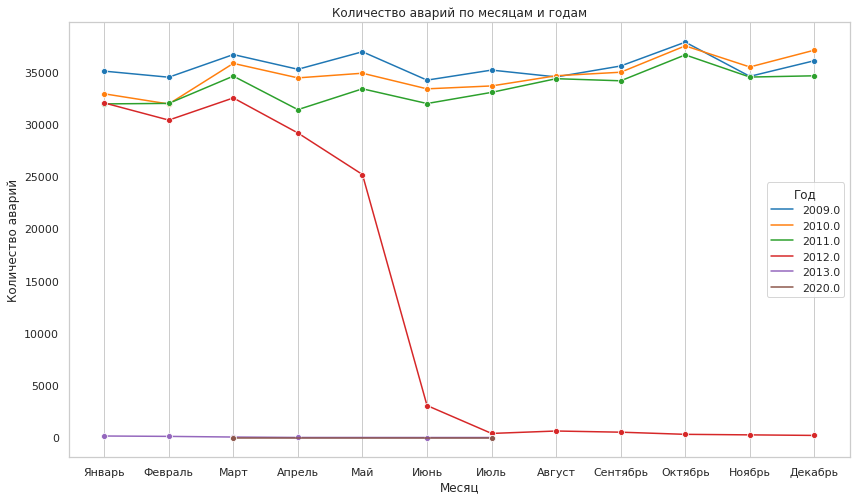

In [ ]:
# стиль
sns.set(style="whitegrid")

# цвета
palette = sns.color_palette("tab10", n_colors=accidents_by_month['year'].nunique())

# построение
plt.figure(figsize=(14, 8))
sns.lineplot(data=accidents_by_month, x='month', y='accident_count', hue='year', marker='o', palette=palette)

plt.xlabel('Месяц')
plt.ylabel('Количество аварий')
plt.title('Количество аварий по месяцам и годам')
plt.xticks(ticks=range(1, 13), labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.legend(title='Год')
plt.grid(axis='y')

plt.show()

По график видим, что у нас фактически отсутствуют данные за 2013 и 2020 года, а так же данные за 2012 год есть только за первые полгода. Либо после июля водители резко стали соблюдать правила ПДД и не попадали не в какие ДТП.

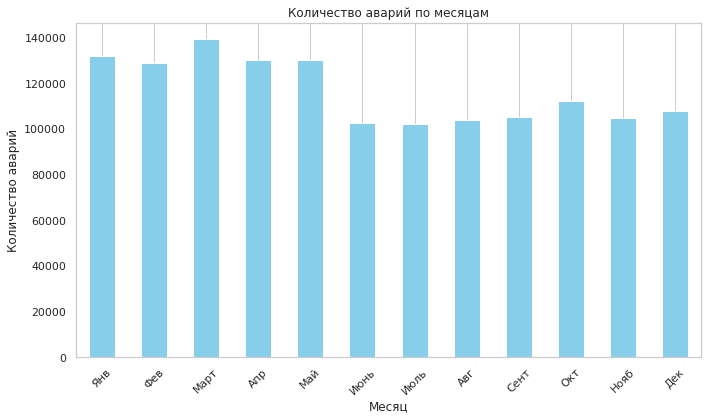

In [ ]:
# Преобразование столбца collision_date в тип datetime
collisions['collision_date'] = pd.to_datetime(collisions['collision_date'])

# Извлечение месяца из даты
collisions['month'] = collisions['collision_date'].dt.month

# Подсчет количества аварий для каждого месяца
monthly_accidents = collisions.groupby('month').size()

# Построение графика
monthly_accidents.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Количество аварий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество аварий')
plt.xticks(ticks=range(12), labels=['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт', 'Нояб', 'Дек'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

На графике представлено количество аварий по месяцам. Мы видим, что наибольшее количество аварий происходит в месяцы Январь-Май. Это может быть связано не только с погодными условиями, но и с другими факторами, такими как увеличенное количество путешествий или активностей на дороге в начале года. В месяцы Июнь-Декабрь количество аварий понижается. Хотя в конце года (особенно в декабре) наблюдается небольшой рост, он все равно не достигает уровня первых пяти месяцев.

#### Создание шести задач для коллег:

- Определить, какое состояние дороги (мокрая, снежная и т.д.) приводит к наиболее серьезным авариям. (collisions и parties);
- Определить, какие типы дорог (автомагистраль, городская дорога и т.д.) наиболее подвержены авариям. (collisions и parties);
- Найти корреляцию между погодными условиями и частотой аварий. (collisions и parties);
- Определить, какое время суток является наиболее опасным с точки зрения аварий. (collisions);
- Исследовать, как возраст водителя влияет на вероятность аварии. (collisions и parties);
- Оценить, как тип транспортного средства (легковой автомобиль, грузовик и т.д.) влияет на серьезность повреждений в аварии. (vehicles и parties).

#### Порядок решения для двух задач из списка

**Задача 1:**

- Создайте SQL-запрос, который свяжет таблицы collisions и parties по case_id и подсчитает количество аварий для каждого состояния дороги.
- Постройте график, который покажет, какое состояние дороги приводит к наибольшему количеству аварий.
- Сделайте вывод на основе графика.

**Для задачи 2:**

- Создайте SQL-запрос, который свяжет таблицы collisions и parties по case_id и подсчитает количество аварий для каждого типа дороги.
- Постройте график, который покажет, какие типы дорог наиболее подвержены авариям.
- Сделайте вывод на основе графика.

#### Задача 1

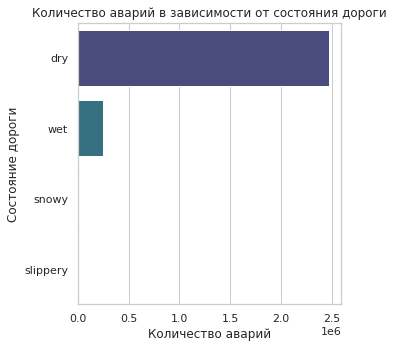

In [ ]:
accidents_by_road_surface_query = '''
SELECT c.road_surface, COUNT(*) AS accident_count
FROM collisions c
JOIN parties p ON c.case_id = p.case_id
GROUP BY c.road_surface
ORDER BY accident_count DESC;
'''

accidents_by_road_surface = pd.read_sql(accidents_by_road_surface_query, engine)

plt.figure(figsize=(5, 5))
sns.barplot(x='accident_count', y='road_surface', data=accidents_by_road_surface, palette='viridis')
plt.xlabel('Количество аварий')
plt.ylabel('Состояние дороги')
plt.title('Количество аварий в зависимости от состояния дороги')
plt.tight_layout()
plt.show()

Видим, что практически 95% всех ДТП происходит на сухой поверхности дороги

#### Задача 2

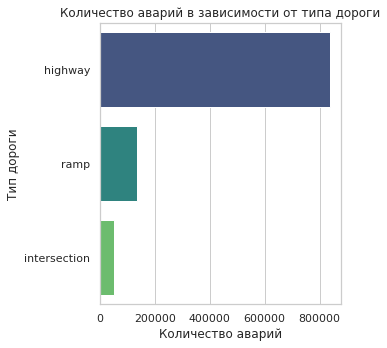

In [ ]:
accidents_by_road_type_query = '''
SELECT c.location_type, COUNT(*) AS accident_count
FROM collisions c
JOIN parties p ON c.case_id = p.case_id
GROUP BY c.location_type
ORDER BY accident_count DESC;
'''

accidents_by_road_type = pd.read_sql(accidents_by_road_type_query, engine)

plt.figure(figsize=(5, 5))
sns.barplot(x='accident_count', y='location_type', data=accidents_by_road_type, palette='viridis')
plt.xlabel('Количество аварий')
plt.ylabel('Тип дороги')
plt.title('Количество аварий в зависимости от типа дороги')
plt.tight_layout()
plt.show()


Здесь видим, что большая часть ДТП произошли на шоссе

### **Этап 4. Подготовка к созданию модели для оценки водительского риска**

#### Подготовка набора данных
Для начала необходимо выделить основные интересующие нас критерии:

- Тип виновника - только машина (car).
- Тип повреждения не равен SCRATCH.
- Данные только за 2012 год.

In [ ]:
query = """
    SELECT
        c.weather_1,
        c.road_surface,
        c.road_condition_1,
        c.lighting,
        p.party_sobriety,
        p.party_drug_physical,
        p.cellphone_in_use,
        p.at_fault,
        v.vehicle_age,
        v.vehicle_transmission
    FROM
        collisions c
    JOIN
        parties p ON c.case_id = p.case_id
    JOIN
        vehicles v ON p.case_id = v.case_id AND p.party_number = v.party_number
    WHERE
        p.party_type = 'car'
        AND c.collision_damage != 'scratch'
        AND EXTRACT(YEAR FROM c.collision_date) = 2012
"""

data = pd.read_sql(query, engine)
data.head()

,weather_1,road_surface,road_condition_1,lighting,party_sobriety,party_drug_physical,cellphone_in_use,at_fault,vehicle_age,vehicle_transmission
0,clear,dry,obstruction,daylight,had not been drinking,None,0.0,1,9.0,manual
1,clear,dry,normal,daylight,impairment unknown,G,0.0,0,NaN,auto
2,clear,dry,normal,dark with street lights,had not been drinking,None,0.0,1,8.0,auto
3,clear,dry,normal,dark with no street lights,"had been drinking, under influence",None,0.0,1,6.0,auto
4,cloudy,wet,normal,daylight,had not been drinking,None,0.0,1,11.0,auto


Датасет получился, отображается корректно

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weather_1             56080 non-null  object 
 1   road_surface          55900 non-null  object 
 2   road_condition_1      55999 non-null  object 
 3   lighting              56094 non-null  object 
 4   party_sobriety        55376 non-null  object 
 5   party_drug_physical   2857 non-null   object 
 6   cellphone_in_use      51777 non-null  float64
 7   at_fault              56248 non-null  int64  
 8   vehicle_age           54554 non-null  float64
 9   vehicle_transmission  55389 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


Учитывая набор данных и характер вождения, на вероятность аварии могут повлиять следующие факторы:

- weather_1: погодные условия могут существенно повлиять на безопасность вождения;

- road_surface: состояние дорожного покрытия может повлиять на сцепление и устойчивость;

- road_condition_1: дорожные условия, такие как влажная, обледенелая или строящаяся дорога, могут влиять на риск вождения;

- lighting: плохое освещение может ухудшить видимость и повысить риск несчастных случаев;

- party_sobriety: уровень трезвости водителя является решающим фактором безопасности вождения;

- party_drug_physical: влияние наркотиков или физическое состояние водителя могут ухудшить его способности к вождению;

- cellphone_in_use: использование мобильного телефона во время вождения может отвлекать водителя;

- vehicle_age: в старых автомобилях могут отсутствовать современные функции безопасности, что увеличивает риск;

- vehicle_transmission: тип коробки передач может влиять на стиль вождения и время реакции.

<div class="alert alert-success">
<b>👍 Успех:</b> Датасет сформирован, признаки отобраны!
</div>

#### Предобработка данных

Обработка прорущенных значений

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_df = pd.DataFrame({
    'Пропущенные значения': missing_values,
    'Процент': missing_percentage
})

missing_df.sort_values(by='Процент', ascending=False)

,Пропущенные значения,Процент
party_drug_physical,53391,94.920708
cellphone_in_use,4471,7.948727
vehicle_age,1694,3.011663
party_sobriety,872,1.550277
vehicle_transmission,859,1.527165
road_surface,348,0.618689
road_condition_1,249,0.442682
weather_1,168,0.298677
lighting,154,0.273788
at_fault,0,0.000000


Обработка пропущенных значений требует решений, специфичных для предметной области. Вот общий подход, который мы можем использовать, исходя из недостающего процента пропущенных значений:

1. Удаление столбцов. Для столбцов с высоким процентом пропущенных значений (например, party_drug_physical) может иметь смысл вообще удалить столбец, особенно если уровень пропущенных данных превышает 90%.

2. Заполнить с помощью наиболее частого значения: для категориальных переменных с более низким процентом пропущенных значений мы можем заполнить пропущенные значения с помощью mode (наиболее частого значения) столбца.

3. Заполнить медианой: для непрерывных переменных, таких как vehicle_age, мы можем заполнить недостающие значения медианой столбца.

4. Особые случаи: для таких столбцов, как cellphone_in_use, которые выглядят как двоичный индикатор (0 или 1), возможно, имеет смысл рассматривать пропущенные значения как «неизвестные» или заполнять специальным значением.

In [ ]:
data = data.drop(columns=['party_drug_physical'])

categorical_columns = ['weather_1', 'road_surface', 'road_condition_1', 'lighting', 'party_sobriety', 'vehicle_transmission']
for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

data['vehicle_age'] = data['vehicle_age'].fillna(data['vehicle_age'].median())

# Для «cellphone_in_use» заполним пропущенные значения специальным значением (2), указывающим «неизвестно».
data['cellphone_in_use'] = data['cellphone_in_use'].fillna(2)

remaining_missing = data.isnull().sum()
remaining_missing

weather_1               0
road_surface            0
road_condition_1        0
lighting                0
party_sobriety          0
cellphone_in_use        0
at_fault                0
vehicle_age             0
vehicle_transmission    0
dtype: int64

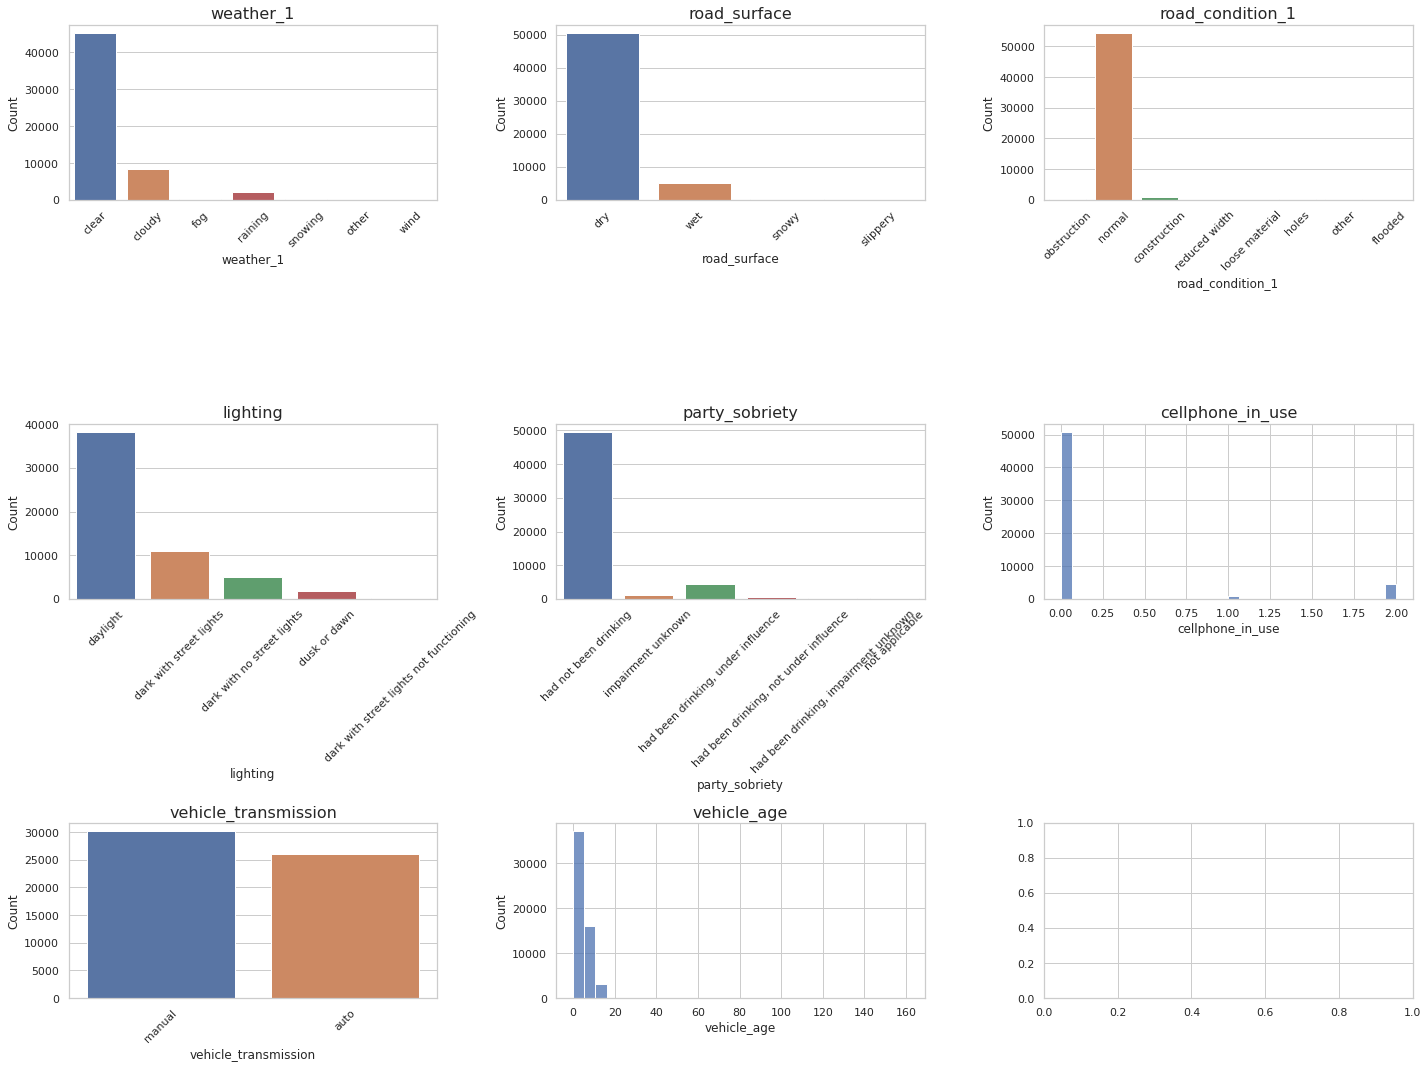

In [ ]:
factors = ['weather_1', 'road_surface', 'road_condition_1', 'lighting', 'party_sobriety',
           'cellphone_in_use', 'vehicle_transmission', 'vehicle_age']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i, factor in enumerate(factors):
    if data[factor].dtype == 'object':
        sns.countplot(x=factor, data=data, ax=axes[i//3, i%3])
        axes[i//3, i%3].tick_params(axis='x', rotation=45)
    else:
        sns.histplot(data[factor], ax=axes[i//3, i%3], bins=30)
    axes[i//3, i%3].set_title(factor, fontsize=16)
    axes[i//3, i%3].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Выводы из графиков:**

- weather_1: Большинство несчастных случаев происходит в ясную погоду, что вполне ожидаемо, поскольку ясная погода является наиболее распространенным явлением;

- road_surface: Судя по всему, на сухих дорогах происходит большинство аварий, что на первый взгляд может показаться нелогичным. Однако это может быть связано с тем, что большая часть вождения приходится на засушливые дни;

- road_condition_1: Аналогично, большинство аварий происходит на дорогах без ям;

- lighting: при дневном свете происходит наибольшее количество аварий, за ним следует темнота c уличным освещением;

- party_sobriety: В большинстве аварий участвуют водители, не употреблявшие алкоголь. Однако это также может быть связано с тем, что большинство водителей на дороге трезвы;

- cellphone_in_use: Небольшая часть ДТП связана с использованием мобильного телефона;

- vehicle_transmission: Автомобили с автоматической коробкой передач участвуют в большем количестве аварий, но это может быть связано с преобладанием автомобилей с автоматической коробкой передач;

- vehicle_age: В большинстве аварий участвуют автомобили возрастом от 0 до 10 лет, с пиком около 2-3 лет.

**Наблюдения и корректировки:**

- Важными факторами могут быть погода, дорожное покрытие и освещение. Несмотря на то, что большинство аварий происходит в ясную погоду и на сухих дорогах, это связано с тем, что такие условия являются наиболее распространенными. Чтобы получить истинную картину, нам нужно будет нормализовать общее количество поездок в каждом состоянии;

- Трезвость являются решающим фактором. Несмотря на то, что в большинстве аварий участвуют трезвые водители, важно понимать соотношение трезвых и нетрезвых водителей на дороге;

- Использование мобильных телефонов, хотя и меньшинство, может быть важным фактором, учитывая потенциальное отвлечение;

- Возраст автомобиля также может играть роль: новые автомобили могут иметь лучшие функции безопасности, но на них также чаще ездят.

#### Подготовка к построению моделей

In [ ]:
data["at_fault"].value_counts()

1    28373
0    27875
Name: at_fault, dtype: int64

Соберем в один пайплайн: заполнение пропусков, масштабирование и кодирование

In [ ]:
# Исходные данные
X = data.drop('at_fault', axis=1)
y = data['at_fault']

# Определение категориальных и числовых признаков
categorical_features = ['weather_1', 'road_surface', 'road_condition_1', 'lighting',
                        'party_sobriety', 'cellphone_in_use', 'vehicle_transmission']
numeric_features = ['vehicle_age']

# Создание трансформера для числовых данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Нормализация данных
])

# Создание трансформера для категориальных данных
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
])

# Препроцессор для преобразования данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Разделение данных на обучающий и тестовый наборы с сохранением пропорции 80% на 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Трансформация обучающего набора данных
X_train_transform = preprocessor.fit_transform(X_train)
X_test_transform  = preprocessor.transform(X_test)

# Вывод размеров наборов данных
print(f'X_train_transformed shape: {X_train_transform.shape}')
print(f'X_test_transformed shape:  {X_test_transform.shape}')

X_train_transformed shape: (44998, 36)
X_test_transformed shape:  (11250, 36)


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### **Этап 5. Построение и поиск лучшей модели**

#### Логистическая регрессия (Logistic Regression)

In [ ]:
def Logistic_Regression(X_train, y_train):
    # Определение модели логистической регрессии
    model = LogisticRegression(random_state = RANDOM_STATE, verbose=0)

    """Определение сетки гиперпараметров, которые будут исследоваться при подборе оптимальных значений."""

    # Определение сетки гиперпараметров, которую нужно исследовать
    param_grid = {
        'penalty': [None, 'l1', 'l2'],        # тип регуляризации (L1 или L2)
        'C': [0.01, 0.1, 1, 10, 100],         # обратная сила регуляризации
        'solver': ['liblinear', 'lbfgs'],     # алгоритм оптимизации (изменил lbfgs на liblinear)
        'max_iter': [500, 7500, 1000],        # максимальное количество итераций
    }

    # Создание экземпляра GridSearchCV с 10 фолдами кросс-валидации и оптимизацией по accuracy
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search.fit(X_train, y_train)

    # Получение лучшей модели с оптимальными гиперпараметрами
    best_model = grid_search.best_estimator_

    # Лучшая оценка (F1-мера) на валидационных данных
    best_f1 = grid_search.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_model

In [ ]:
best_model = Logistic_Regression(X_train_transform, y_train,)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selectio

Лучшая оценка на валидационных данных (F1-мера): 0.505279759748763


#### Решающие деревья (Decision Trees)

In [ ]:
def Decision_Tree_Classifier(X_train, y_train, sampling=None):
    # Определение модели Решающих деревьев
    tree_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

    """
     criterion : критерий для разбиения (индекс Джини или энтропия)
    'gini': Индекс Джини измеряет неопределенность (чистоту) в узле. Чем меньше значение индекса Джини, тем "чище" узел.
    'entropy': Энтропия измеряет степень хаоса или неопределенности в узле. Чем меньше значение энтропии, тем "чище" узел.
    """

    # Определение сетки гиперпараметров для Решающих деревьев
    param_grid_tree = {
        'criterion': ['gini', 'entropy'],           # критерий для разбиения (индекс Джини или энтропия)
        'splitter' : ['best', 'random'],            # стратегия выбора разбиения
        'max_depth': [None, 10, 20, 30, 50],        # максимальная глубина дерева
        'min_samples_split': [2, 5, 10],            # минимальное число примеров для разбиения узла
        'min_samples_leaf': [1, 2, 4],              # минимальное число примеров в листе
    }

    # Создание экземпляра GridSearchCV для Решающих деревьев
    grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_tree.fit(X_train, y_train)

    # Получение лучшей модели Решающих деревьев с оптимальными гиперпараметрами
    best_tree_model = grid_search_tree.best_estimator_

    # Лучшая оценка (метрика accuracy) на валидационных данных
    best_f1 = grid_search_tree.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_tree_model

In [ ]:
best_tree_model = Decision_Tree_Classifier(X_train_transform, y_train)

Лучшая оценка на валидационных данных (F1-мера): 0.5699864033687965


#### Случайный лес (Random Forest)

In [ ]:
def Random_Forest_Classifier(X_train, y_train):
    # Определение модели Случайного леса
    rf_model = RandomForestClassifier(random_state = RANDOM_STATE)

    """
    n_estimators: Количество деревьев в лесу.
    Большее значение может улучшить точность, но увеличит время обучения.
    """

    # Определение сетки гиперпараметров для Случайного леса
    param_grid_rf = {
        'n_estimators': [10, 25, 50],            # количество деревьев в лесу
        'criterion': ['gini', 'entropy'],        # критерий для разбиения (индекс Джини или энтропия)
        'max_depth': [None, 10, 20, 30, 50],     # максимальная глубина дерева
        'min_samples_split': [2, 5, 10],         # минимальное число примеров для разбиения узла
        'min_samples_leaf': [1, 2, 4],           # минимальное число примеров в листе
    }

    # Создание экземпляра GridSearchCV для Случайного леса
    grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_rf.fit(X_train, y_train)

    # Получение лучшей модели Случайного леса с оптимальными гиперпараметрами
    best_rf_model = grid_search_rf.best_estimator_

    # Лучшая оценка (метрика accuracy) на валидационных данных
    best_f1 = grid_search_rf.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_rf_model

In [ ]:
best_rf_model = Random_Forest_Classifier(X_train_transform, y_train)

Лучшая оценка на валидационных данных (F1-мера): 0.5719413914747575


#### Градиентный бустинг (Gradient Boosting)

In [ ]:
def Gradient_Boosting_Classifier(X_train, y_train):
    # Создание экземпляра модели градиентного бустинга
    model_gb = GradientBoostingClassifier(random_state = RANDOM_STATE)

    # Определение сетки гиперпараметров, которую нужно исследовать для градиентного бустинга
    param_grid_gb = {
        'learning_rate': [0.01, 0.1, 0.5],        # Скорость обучения (шаг градиентного спуска)
        'n_estimators': [50, 100, 200],           # Количество базовых моделей (деревьев)
        'max_depth': [3, 5, 7],                   # Максимальная глубина деревьев
    }

    # Создание экземпляра GridSearchCV с 10 фолдами кросс-валидации и оптимизацией по accuracy
    grid_search_gb = GridSearchCV(model_gb, param_grid_gb, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_gb.fit(X_train, y_train)

    # Получение лучшей модели с оптимальными гиперпараметрами
    best_model_gb = grid_search_gb.best_estimator_

    # Лучшая оценка (метрика accuracy) на валидационных данных
    best_f1 = grid_search_gb.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_model_gb

In [ ]:
best_model_gb = Gradient_Boosting_Classifier(X_train_transform, y_train)

Лучшая оценка на валидационных данных (F1-мера): 0.5773677969179363


In [ ]:
def display_learning_curves(model, X, y, cv):
    """
    Вычисляет и отображает кривые обучения для заданной модели, используя F1-меру.

    Параметры:
    model : object
        Обученная модель.
    X : array-like
        Признаки для обучения модели.
    y : array-like
        Целевая переменная для обучения модели.
    cv : int
        Количество блоков в кросс-валидации.

    Возвращает:
    None
    """

    # Вычисление кривых обучения с использованием F1-меры
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, scoring='f1')

    # Усреднение оценок F1 на тренировочной и валидационной выборках
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Вычисление стандартного отклонения на тренировочной и валидационной выборках
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Визуализация кривых обучения
    plt.figure(figsize=(10, 7))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='F1 на тренировочной выборке')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
    plt.plot(train_sizes, val_scores_mean, 'o-', label='F1 на кросс-валидационной выборке')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.2)

    # Добавление элементов на график
    plt.title('Кривые обучения (F1-мера)')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('F1-мера')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

    # Вывод результатов F1-меры на тренировочной выборке
    print("F1-мера на тренировочной выборке:")
    for size, score, std in zip(train_sizes, train_scores_mean, train_scores_std):
        print(f"Размер выборки: {size}, F1-мера: {score:.2f} +/- {std:.2f}")

    # Вывод результатов F1-меры на кросс-валидационной выборке
    print("\nF1-мера на кросс-валидационной выборке:")
    for size, score, std in zip(train_sizes, val_scores_mean, val_scores_std):
        print(f"Размер выборки: {size}, F1-мера: {score:.2f} +/- {std:.2f}")

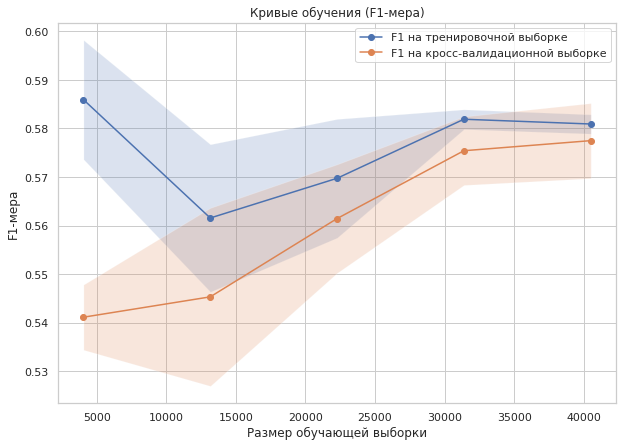

F1-мера на тренировочной выборке:
Размер выборки: 4049, F1-мера: 0.59 +/- 0.01
Размер выборки: 13161, F1-мера: 0.56 +/- 0.02
Размер выборки: 22273, F1-мера: 0.57 +/- 0.01
Размер выборки: 31385, F1-мера: 0.58 +/- 0.00
Размер выборки: 40498, F1-мера: 0.58 +/- 0.00

F1-мера на кросс-валидационной выборке:
Размер выборки: 4049, F1-мера: 0.54 +/- 0.01
Размер выборки: 13161, F1-мера: 0.55 +/- 0.02
Размер выборки: 22273, F1-мера: 0.56 +/- 0.01
Размер выборки: 31385, F1-мера: 0.58 +/- 0.01
Размер выборки: 40498, F1-мера: 0.58 +/- 0.01


In [ ]:
# Отображение кривых обучения
display_learning_curves(best_model_gb, X_train_transform, y_train, cv=10)

Из результато видим, что лучше всего себя показала модель обученная алгоритмом градиентного бустинга. Значит далее её и будем рассматривать. Посмотрим на то как она себя поведет с тестовыми данными.

### **Этап 6. Проверим лучшую модель в работе**

Предскажем значения на тесте

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Оценивает модель на тестовом наборе данных по метрикам F1-мера и точность.

    Параметры:
    model : object
        Обученная модель.
    X_test : array-like
        Признаки тестовой выборки.
    y_test : array-like
        Целевая переменная тестовой выборки.

    Возвращает:
    None
    """

    # Сделать предсказания на тестовом наборе данных
    y_pred = model.predict(X_test)

    # Рассчитать F1-меру
    f1 = f1_score(y_test, y_pred, average='binary')
    print(f"F1-мера на тестовом наборе: {f1:.4f}")

    # Рассчитать точность
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность на тестовом наборе: {accuracy:.4f}")

In [ ]:
# Вызов функции для оценки лучшей модели на тестовых данных
evaluate_model(best_model_gb, X_test_transform, y_test)

F1-мера на тестовом наборе: 0.5816
Точность на тестовом наборе: 0.6210


Отлично, видим, что на тестовых данных модель буквально слегка лучше себя повела, чем на валидационной выборке.

In [ ]:
def display_confusion_matrix(y_true, y_pred, model_name):
    """
    Визуализирует и отображает матрицу ошибок для заданной модели.

    Параметры:
    y_true : array-like
        Верные (истинные) метки.
    y_pred : array-like
        Предсказанные метки, как возвращено классификатором.
    model_name : string
        Название модели, используется для заголовка графика и в выводе информации.

    Возвращает:
    None
    """

    # Получение матрицы ошибок
    cm = confusion_matrix(y_true, y_pred)

    # Визуализация матрицы ошибок
    plt.figure(figsize=(10,7))

    # Отображаем информацию о каждом квадрате
    labels = ['Истинно отрицательные (TN)', 'Ложноположительные (FP)', 'Ложноотрицательные (FN)', 'Истинноположительные (TP)']
    labels = np.asarray(labels).reshape(2,2)

    # Расчет процентного соотношения
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100

    # Создание тепловой карты
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')

    ax = plt.gca()

    # Добавление меток
    for i in range(2):
        for j in range(2):
            ax.text(j+0.5, i+0.6, '{}\n({:.2f}%)'.format(labels[i, j], cm_perc[i, j]),
                    ha='center', va='center')

    plt.show()

    # Вывод текстового результата
    tn, fp, fn, tp = cm.ravel()
    tn_perc, fp_perc, fn_perc, tp_perc = cm_perc.ravel()

    print(f"Истинно отрицательные (TN): {tn} ({tn_perc:.2f}%)")
    print(f"Ложноположительные    (FP): {fp} ({fp_perc:.2f}%)")
    print(f"Ложноотрицательные    (FN): {fn} ({fn_perc:.2f}%)")
    print(f"Истинноположительные  (TP): {tp} ({tp_perc:.2f}%)")

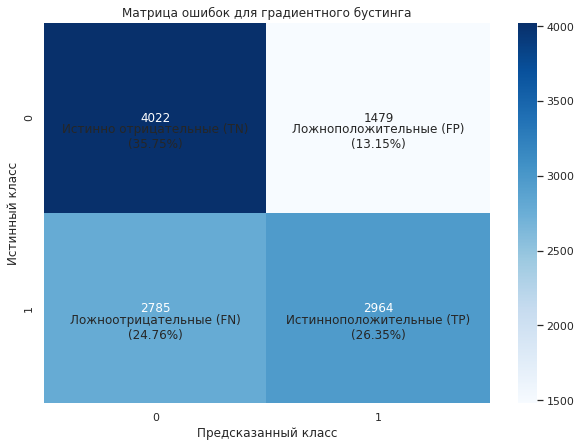

Истинно отрицательные (TN): 4022 (35.75%)
Ложноположительные    (FP): 1479 (13.15%)
Ложноотрицательные    (FN): 2785 (24.76%)
Истинноположительные  (TP): 2964 (26.35%)


In [ ]:
# Прогнозирование на тестовой выборке
y_test_pred = best_model_gb.predict(X_test_transform)

# Вызов функции для отображения матрицы ошибок
display_confusion_matrix(y_test, y_test_pred, "градиентного бустинга")

Модель эффективно идентифицирует истинно отрицательные случаи (35.75%), однако допускает значительное количество ложноотрицательных (24.76%) и ложноположительных (13.15%) ошибок. Точность истинноположительных предсказаний составляет 26.35%, что указывает на потенциальные слабые стороны в распознавании положительных классов. Такая ситуация может потребовать применения более сложных моделей для улучшения точности предсказаний.

#### Анализ важности основных факторов

In [ ]:
# Получение имен признаков после one-hot кодирования
if hasattr(preprocessor.named_transformers_['cat'].named_steps['onehot'], 'get_feature_names_out'):
    feature_names_categorical = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
else:
    feature_names_categorical = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features))

feature_names = numeric_features + feature_names_categorical

# Вывод количества признаков после преобразования
print(f"Total features after transformation: {len(feature_names)}")

Total features after transformation: 36


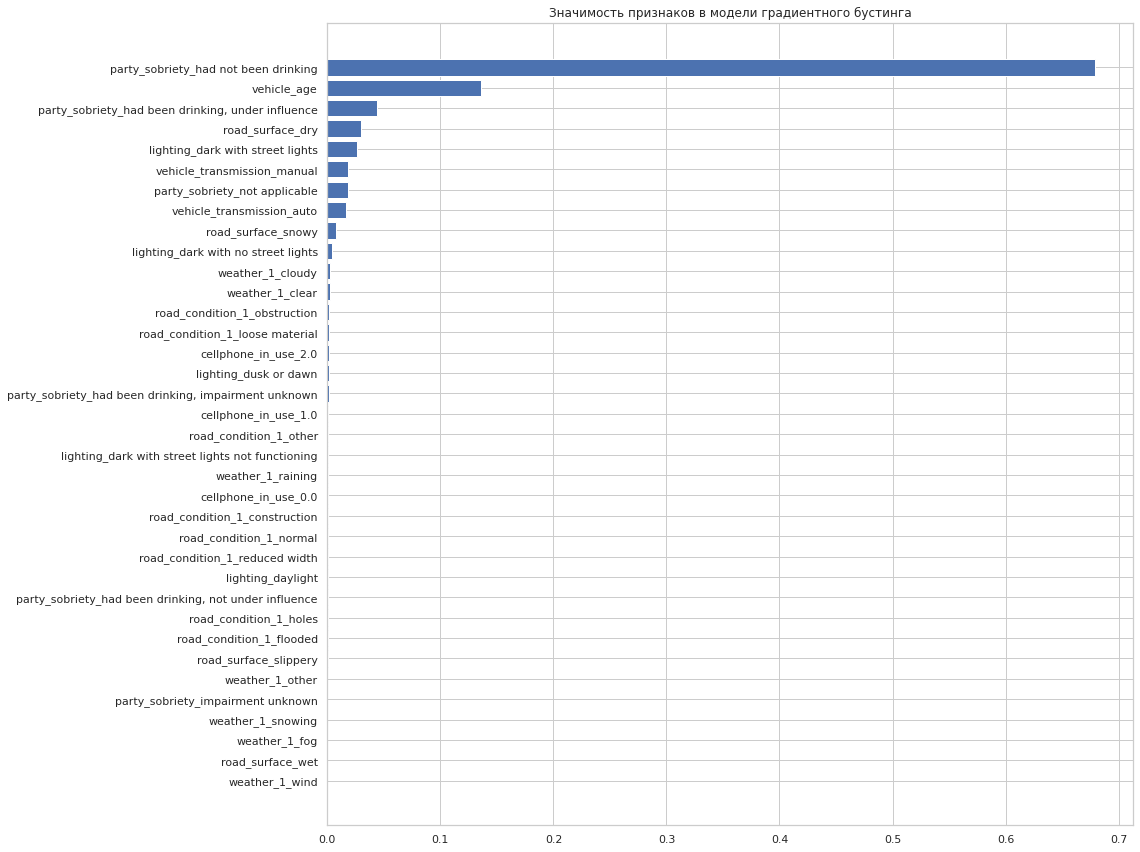

In [ ]:
def plot_feature_importance_horizontal(model, feature_names):
    """
    Визуализация значимости признаков для модели градиентного бустинга.

    Функция создаёт горизонтальную столбчатую диаграмму, показывающую важность признаков.

    Параметры:
        model (GradientBoostingClassifier): Обученная модель градиентного бустинга.
        feature_names (list of str): Список признаков, используемых моделью.

    Возвращает:
        None: Функция только отображает график и ничего не возвращает.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(16, 12))
    plt.title("Значимость признаков в модели градиентного бустинга")
    plt.barh(range(len(importances)), importances[indices], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


plot_feature_importance_horizontal(best_model_gb, feature_names)

Наиболее важным фактором на графике является "party_sobriety_had been drinking, under influence". Это указывает на то, что участник ДТП употреблял алкоголь и находился под его влиянием до ДТП. Этот фактор является ключевым при определении вероятности того, будет ли участник ДТП виновен в произошедшем. Также важным фактором является: "party_sobriety_had not been drinking"

Название признака предполагает, что он связан с тем, не употреблял ли участник ДТП алкоголь до происшествия. Этот фактор, по-видимому, имеет важное значение для прогнозирования целевой переменной. Для этого проведем дополнительные исследования:

1. Графический анализ: - Мы построим график распределения целевой переменной at_fault по отношению к признакам party_sobriety.

2. Предложение по оборудованию автомобиля, чтобы учесть этот фактор во время посадки водителя: - Основываясь на наших выводах, мы предложим потенциальные вмешательства или стратегии, которые можно было бы использовать.

#### Дополнительное исследование для одного из важных факторов

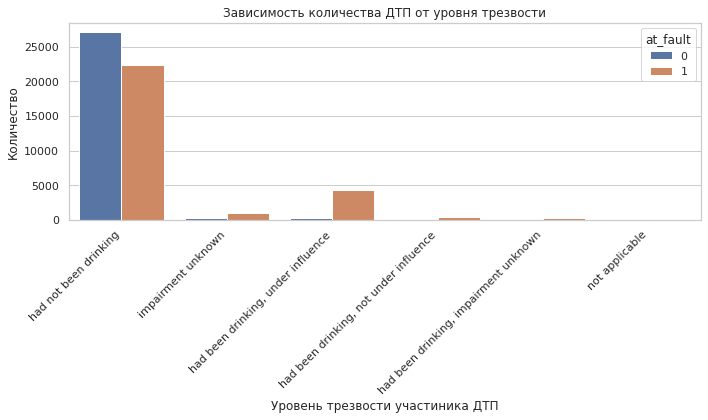

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='party_sobriety', hue='at_fault')
plt.title('Зависимость количества ДТП от уровня трезвости')
plt.xlabel('Уровень трезвости участиника ДТП')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Гистограмма иллюстрирует зависимость количества ДТП от уровня трезвости. Вот краткий анализ:

Had Not Been Drinking (Не был пьян): в значительном количестве ДТП участвуют люди, которые не были пьяны. Это может быть связано с различными другими факторами, такими как отвлекающие факторы, влияние других средств или условия окружающей среды.
Другие уровни трезвости: мы также наблюдаем различное количество ДТП с участием людей с разным уровнем трезвости.
Предложение по оборудованию автомобиля:

Учитывая большое количество ДТП с участием лиц, не употребляющих алкоголь, подчеркивается необходимость принятия более широких мер безопасности, помимо простого контроля за употреблением алкоголя. Однако для уровней трезвости, которые указывают на употребление алкоголя:

1. Оснастить автомобили анализаторами алкогольного опьянения. Подобно проверке на алкотестере, используемому правоохранительными органами, автомобили могут быть оборудованы анализаторами алкогольного опьянения. Измерение состояния водителя при запуске автомобиля можно было бы сделать обязательным требованием для получения разрешения на вождение.
2. Камера наблюдения. Чтобы убедиться, что проверку проходит именно водитель, на сиденье водителя можно направить камеру для наблюдения за процессом.
3. Обучение водителей. Повышать осведомленность об опасностях вождения в нетрезвом виде и важности трезвого вождения.
4. Усовершенствованные системы помощи водителю (ADAS). Внедрить расширенные функции помощи водителю, такие как предупреждения о выходе из полосы движения, автоматическое экстренное торможение и т.д., чтобы помочь водителям и потенциально предотвратить несчастные случаи.

Важно помнить: хотя «Had Not Been Drinking (Не был пьян)» является главным фактором, он не обязательно указывает на причинно-следственную связь. Другие факторы в сочетании с этим могут привести к ДТП. Крайне важно рассмотреть целостный подход к повышению безопасности дорожного движения.

## **Общий вывод**

### **Выводы по работе модели градиентного бустинга:**

**Краткое описание лучшей модели:**

Лучшая модель, которую мы обучили, — это классификатор градиентного бустинга. Градиентный бустинг — это мощный алгоритм машинного обучения, основанный на ансамбле слабых предсказывающих моделей, обычно деревьев решений.

### **Вот основные характеристики:**

**Модель: Gradient Boosting Classifier**
- Показатели эффективности:
    - Лучшая F1-мера на валидационных данных: 0.5774
    - F1-мера на тренировочной выборке: 0.59 ± 0.01 (при размере выборки 40498)
    - F1-мера на кросс-валидационной выборке: 0.58 ± 0.01 (при размере выборки 40498)
    - F1-мера на тестовом наборе: 0.5816
    - Точность на тестовом наборе: 0.6210
    
**Оценка способности модели к предсказанию:**

Модель показывает стабильные результаты на различных размерах выборки, что говорит о её надёжности и генерализующей способности. На тестовых данных F1-мера и точность показывают, что модель довольно эффективно идентифицирует истинные случаи, однако остаётся пространство для улучшения:

- Истинно отрицательные (TN): 4022 (35.75%) — модель хорошо идентифицирует отсутствие событий.
- Ложноположительные (FP): 1479 (13.15%) — часть событий ошибочно идентифицирована как наступившие.
- Ложноотрицательные (FN): 2785 (24.76%) — значительная часть наступивших событий пропущена.
- Истинноположительные (TP): 2964 (26.35%) — правильно идентифицированные события.

Исходя из значений полноты и точности, модель может быть использована как основа для системы оценки риска, но для достижения высокой точности важно дополнительно анализировать пропущенные положительные случаи и уменьшить число ложноположительных результатов.

**Анализ значимости признаков:**

Анализ значимости признаков показывает, что некоторые признаки, такие как уровень трезвости, имеют большое влияние на прогнозы модели. Эта информация может быть использована для более глубокого понимания причинно-следственных связей в данных и для уточнения модели, возможно, путём включения дополнительных признаков или создания композитных показателей.

**Заключение:**

В целом, классификатор градиентного бустинга демонстрирует сильную способность к различению классов, однако результаты предсказаний на тестовой выборке и анализ ошибок показывают, что для повышения эффективности системы предсказаний необходимо улучшение модели. Возможно, улучшение может быть достигнуто за счет использования более сложных моделей или интеграции дополнительных данных.

**Предлагаемые дополнительные факторы для улучшения модели:**

- История вождения. Прошлый послужной список водителя, включая предыдущие аварии, нарушения правил дорожного движения и штрафы, может быть сильным предиктором;

- Время суток. Аварии могут происходить чаще в определенное время, например, в часы пик или поздно ночью;

- Тип транспортного средства. Разные транспортные средства могут иметь разные профили риска. Например, с грузовиками могут происходить другие аварии, чем с седанами;

- Возраст и опыт водителя. Более молодые или менее опытные водители могут иметь разные профили риска;

- Данные о местоположении. Некоторые районы могут быть более подвержены авариям из-за таких факторов, как качество дорог, плотность движения или местные правила;

- Поведенческие факторы. Данные об использовании телефона во время вождения, использовании ремней безопасности или скорости могут иметь решающее значение;

- Данные об окружающей среде. Информация о видимости, качестве воздуха или даже активности диких животных может сыграть роль в несчастных случаях.